<a href="https://colab.research.google.com/github/Vijaypurushoth988373/DW12_task_6/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regresion**

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_fwf("/content/brain_body.txt")
dataset.head(10)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
5,27.660,115.0
6,14.830,98.2
7,1.040,5.5
8,4.190,58.0
9,0.425,6.4


In [ ]:
print(dataset.shape)
dataset.head()

(62, 2)


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
dataset.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


No skew in the data. 

In [ ]:
dataset.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.dtypes

Brain    float64
Body     float64
dtype: object

Median and mean are closer to each other - there is less skew in the data

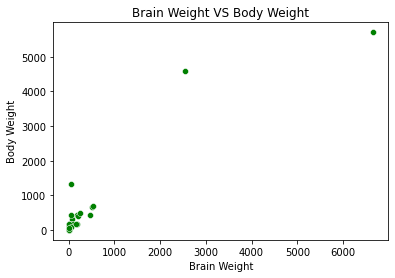

In [ ]:
import seaborn as sns
sns.scatterplot(x='Brain', y='Body', data=dataset, color='green')
plt.title('Brain Weight VS Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [ ]:
dataset.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.



In [ ]:
dataset.Body.values

array([4.450e+01, 1.550e+01, 8.100e+00, 4.230e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       4.603e+03, 3.000e-01, 4.190e+02, 6.550e+02, 3.500e+00, 1.150e+02,
       2.560e+01, 5.000e+00, 1.750e+01, 6.800e+02, 4.060e+02, 3.250e+02,
       1.230e+01, 1.320e+03, 5.712e+03, 3.900e+00, 1.790e+02, 5.600e+01,
       1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01, 4.900e+02,
       1.210e+01, 1.750e+02, 1.570e+02, 4.400e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

# Preparing the data

In [ ]:
X = dataset.loc[:, ['Brain']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Body'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 17745)

In [ ]:
y_test

array([3.000e+00, 5.800e+01, 1.700e+01, 5.040e+01, 6.550e+02, 3.920e+01,
       4.450e+01, 2.500e-01, 6.300e+00, 1.250e+01, 1.195e+02, 1.230e+01,
       1.750e+01])

In [ ]:
X_train.shape, X_test.shape

((49, 1), (13, 1))

# Normlising/Scaling the data

In [ ]:
#from sklearn.preprocessing import StandardScaler # importing the required function
#scaler = StandardScaler() #initialis
##scaler.fit(X_train) # find the values of mu and sigma
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
X_test

array([[1.220e-01],
       [4.190e+00],
       [4.050e+00],
       [4.235e+00],
       [5.210e+02],
       [4.288e+00],
       [3.385e+00],
       [1.000e-02],
       [1.700e+00],
       [1.400e+00],
       [3.633e+01],
       [7.500e-01],
       [1.410e+00]])

# Modelling

In [ ]:
#Model for algorithm - score = (m * hours) + c

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

106.49865282884923


In [ ]:
print(regressor.coef_) # 

# predicted score  = 9.72 * (hours) + 2.76

[0.96238555]


In [ ]:
regressor.predict([[3.385]])

array([109.75632791])

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([106.61606387, 110.53104828, 110.3963143 , 110.57435563,
       607.90152364, 110.62536206, 109.75632791, 106.50827668,
       108.13470826, 107.8459926 , 141.46211981, 107.22044199,
       107.85561645])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,3.00,106.616064
1,58.00,110.531048
2,17.00,110.396314
3,50.40,110.574356
4,655.00,607.901524
5,39.20,110.625362
6,44.50,109.756328
7,0.25,106.508277
8,6.30,108.134708
9,12.50,107.845993


# Metrics

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7687897932432868


# the R^2 value is **0.768**